# Summary
* Raster
* Download image 2 different dates
* Mathematical operation
* Media
* Media from 2 images
* The best pixel
* Difference between images
* Spectral indices
* NDVI
* SAVI
* EVI
* NBR
* Difference between indices
* Real application
* Histogram
* Homework
* Homework solution

# Raster

Raster is a data matrix that represents a geographic image where each pixel has the spectral value that represents a certain area in x and y on the globe.

There are multi-spectral images that are images that contain more than one layer and each one has a different sensitivity than the other in the range of the electromagnetic spectrum, in this case each layer is called a spectral band.

Conventional cameras are usually sensitive to the red, green and blue of the spectrum, which is the spectra visible to the human eye. Satellites carry sensors that are capable of capturing visible and invisible data, thus combining a large array of data for spatial analysis.


The Landsat satellite, for example, has 11 bands, providing a lot of information for analysis.

# Download image 2 different dates

In [1]:
import urllib.request

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF')


url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190212_20190222_01_T1/LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF')

('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF',
 <http.client.HTTPMessage at 0x7fd6f2f82eb8>)

Now let's do several experiments with these two images, performing different types of calculations

# Mathematical operation

To perform the operations is necessary to read the raster data, and move to a number matrix, with this matrix, we can create various types of calculations and analysis that leads us to important information.


An example of simple and useful calculation, is in a soybean agriculture, checking the area productivity and being calculating the area of production and estimating profits.

# Media

Before we get started, let's check if rasterIO is installed.

In [2]:
!pip install rasterio

     |████████████████████████████████| 18.0MB 232kB/s 


Having a daily acquisition of images, you can see if the average is maintaining or not. This calculation is made as follows:

In [4]:
import rasterio as rio

# Band 5 = near infrared
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  b5_jan = src.read(1)

with rio.open('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF') as src:
  b5_feb = src.read(1)

print('Media NIR in January: %s' % b5_jan.mean())
print('Media NIR in February: %s' % b5_feb.mean())

Media NIR in January: 19569.207308588757
Media NIR in February: 20534.10785363875


# Media from 2 images

In [8]:
b5_mean = (b5_jan + b5_feb) / 2

print('Media NIR 2 month: %s' % b5_mean.mean())

Media NIR 2 month: 13247.652794424515


At this point we have a raster that represents the average value between the 2 months calculated for each pixel. We can view this data.

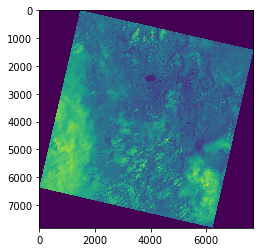

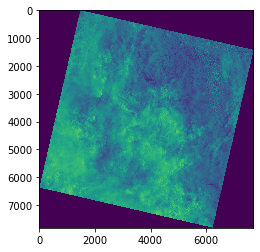

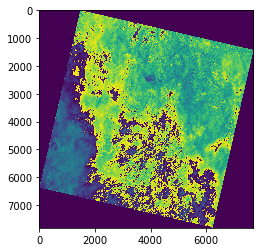

In [9]:
from rasterio.plot import show

show(b5_jan)
show(b5_feb)
show(b5_mean)

# The best pixel

Depending on the application, we may choose to choose the best pixel among images and form a single image. For example, in one cloud image and one not, we can think about how to choose the pixel from the cloudless image and replace it with the cloud image.


For this we need to understand our data and develop an equation that expresses what we want. In the example below we will leave the highest value pixel between the 2 passages.

Let's use numpy, so we will check if it has been installed and then import it.

In [10]:
!pip install numpy

In [0]:
import numpy as np

max_pixel = np.where(b5_feb > b5_jan, b5_feb, b5_jan)

With numpy where, only the February pixel that is larger than the same overlapping January pixel was selected. If this condition does not apply, the January pixel is chosen, which must be greater than or equal to February. Thus having an array with the largest possible value for each pixel.


We can also show this data

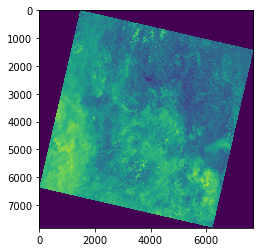

In [12]:
show(max_pixel)

# Difference between images

Using difference between images, we can highlight area where there was a big change.

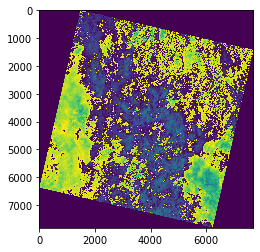

In [14]:
img_dif = b5_feb - b5_jan
show(img_dif)

# Spectral indices

Spectral indices are the results of mathematical operations between the bands of an image.

For example B5 + B6 / 3 * B2 = MY_INDEX


There are several studies that show that some indexes are better than others to identify any target in the image.

On the website [Index Database](https://www.indexdatabase.de/) there is a large database of mathematical formulas of the most popular indexes in the literature. We will see some below, so we will need to download other bands from Landsat.

In [32]:
import urllib.request

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B2.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B2.TIF')

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF')

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF')

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B7.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B7.TIF')

('LC08_L1TP_229071_20190111_20190111_01_RT_B7.TIF',
 <http.client.HTTPMessage at 0x7fd6e6946860>)

# NDVI


The Normalized Difference Vegetation Index (NDVI) is an indicator of the proportion and condition of green vegetation. Generally for surfaces with some vegetation the value of NDVI is positive, for surfaces without vegetation the value is null, while for water and clouds the value is usually negative. The closer to the positive end, the higher the density of the vegetation cover, that is, it is consistent with its dense and developed stage. This value gradually decreases for less dense vegetation cover, which has positive but not very high values.

In [0]:
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)

ndvi = np.ma.divide(
    (band_nir - band_red),
    (band_nir + band_red)
)

# SAVI

Soil Adjusted Vegetation Index (SAVI) was an index created to improve the NDVI index, seeking to alleviate soil errors in NDVI.

In [0]:
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)


savi = ((band_nir - band_red) / (band_nir + band_red + 0.5)) * (1.5)

# EVI

EVI is similar to Normalized Difference Vegetation Index (NDVI) and can be used to quantify vegetation greenness. However, EVI corrects for some atmospheric conditions and canopy background noise and is more sensitive in areas with dense vegetation

In [0]:
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B2.TIF') as src:
  band_blue = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)


evi = 2.5 * ((band_nir - band_red) / (band_nir + 6 * band_red - 7.5 * band_blue + 1))

# NBR

NBR is used to identify burned areas and provide a measure of burn severity

In [0]:
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B7.TIF') as src:
  band_swirl = src.read(1)


nbr = np.ma.divide(
    (band_nir - band_swirl),
    (band_nir + band_swirl)
)

# Difference between indices

As mentioned at the beginning of the class, we can follow the growth of a vegetation using the NDVI index. For this we can subtract NDVI between different dates, thus knowing how the vegetation changed throughout the year. Below is an example of how to calculate this difference between indices.

For this we will need to download now the other bands of the second image.

In [34]:
import urllib.request

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190212_20190222_01_T1/LC08_L1TP_229071_20190212_20190222_01_T1_B4.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190212_20190222_01_T1_B4.TIF')

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190212_20190222_01_T1/LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF')

('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF',
 <http.client.HTTPMessage at 0x7fd6e69094a8>)

With the download done, we can read and then perform the necessary calculations.

In [0]:
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)

ndvi_jan = np.ma.divide(
    (band_nir - band_red),
    (band_nir + band_red)
)

with rio.open('LC08_L1TP_229071_20190212_20190222_01_T1_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF') as src:
  band_nir = src.read(1)

ndvi_feb = np.ma.divide(
    (band_nir - band_red),
    (band_nir + band_red)
)

ndvi_dif = ndvi_feb - ndvi_jan

That done, we have a matrix with the difference of NDVI, now all mathematical analysis can be done on this variable NDVI_DIF.

# Histogram

You can calculate the histogram to identify how the data is distributed.

In [59]:
np.histogram(ndvi_dif, bins=10)

(array([       2,        0,        1,        4,       29,      255,
            4080, 60223673,     1415,       62]),
 array([-21788.25106179, -18723.15269012, -15658.05431846, -12592.95594679,
         -9527.85757512,  -6462.75920345,  -3397.66083178,   -332.56246011,
          2732.53591156,   5797.63428322,   8862.73265489]))

The result is two lists, the first being the classes and the second the amount of pixels by their respective class.

# Real application

An example of a slightly more advanced application is the mapping of burned area scars using the composition of different indices and application of thresholds.

In the [INPE Burning Program] (http://www.inpe.br/queimadas) it is to check some products using the index composition to map [burned area 30m](http://www.inpe.br/queimadas/aq30m) with Landsat 8 images.

# Homework

Create a mask to identify where vegetation is very high and suitable for a forest fire, ie NDVI above 0.8.

# Homework solution

In [0]:
import rasterio as rio
import numpy as np
from rasterio.plot import show


with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B4.TIF') as src:
  band_red = src.read(1)

with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  band_nir = src.read(1)

ndvi = np.ma.divide(
    (band_nir - band_red),
    (band_nir + band_red)
)

In [0]:
mask_ndvi = np.where(ndvi > 0.8, 1, 0)

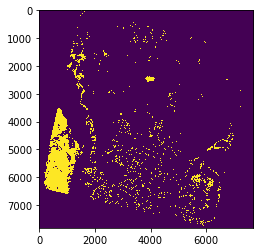

In [62]:
show(mask_ndvi)